## 1. Introduction

A census is the procedure of systematically acquiring and recording information about the members of a given population. The census is a special, wide-range activity, which takes place once a decade in the entire country. The purpose is to gather information about the general population, in order to present a full and reliable picture of the population in the country - its housing conditions and demographic, social and economic characteristics. The information collected includes data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc.

## Data description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The prediction task is to determine whether a person makes over $50K a year.


### Features Description
#### 1. Categorical Attributes

- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    - Individual work category
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
   - Individual's highest education degree
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
   - Individual marital status
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
   - Individual's occupation
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
   - Individual's relation in a family
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
   - Race of Individual
- sex: Female, Male.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
   - Individual's native country
#### 2. Continuous Attributes

- age: continuous.
- Age of an individual
- fnlwgt: final weight, continuous.
- The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- Individual's working hour per week

In [255]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats # Statistics
import warnings
warnings.filterwarnings('ignore')# Avoid warnings

In [256]:
# importing the data
data = pd.read_csv('adult.csv')

In [257]:
# top 5 rows of the dataset
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [258]:
# last 5 rows of the dataset
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [259]:
# randomly selected rows
data.sample(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
39741,69,Private,230417,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,China,>50K
31071,32,Private,250354,10th,6,Never-married,Craft-repair,Other-relative,White,Male,0,0,45,United-States,<=50K
22848,19,Self-emp-not-inc,116385,11th,7,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
9114,52,Private,254230,9th,5,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,45,United-States,>50K
14189,25,Private,185836,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
2885,40,Private,320451,Bachelors,13,Married-civ-spouse,Tech-support,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
45680,21,Private,265356,Some-college,10,Never-married,Sales,Other-relative,White,Male,0,0,40,United-States,<=50K
16125,24,Private,194848,Bachelors,13,Never-married,Tech-support,Own-child,White,Male,0,0,40,United-States,<=50K
16792,53,?,251804,5th-6th,3,Widowed,?,Unmarried,Black,Female,0,0,30,United-States,<=50K
19437,33,Private,94235,Prof-school,15,Never-married,Prof-specialty,Own-child,White,Male,0,0,42,United-States,>50K


In [260]:
# getting statistcal measure of the dataset
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [261]:
# summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [262]:
# Numerical Columns

numerical_data = data.select_dtypes(['int64','float64'])
numerical_columns = numerical_data.columns

print(f'Numerical Columns : {list(numerical_columns)}')

Numerical Columns : ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [263]:
# categorical columns 
categorical_data = data.select_dtypes(['object'])

categorical_columns = categorical_data.columns

print(f"Categorical_columns : {list(categorical_columns)}")

Categorical_columns : ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [264]:
# changing the label in income column
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1})

## Data Analysis


#### Univariate Analysis

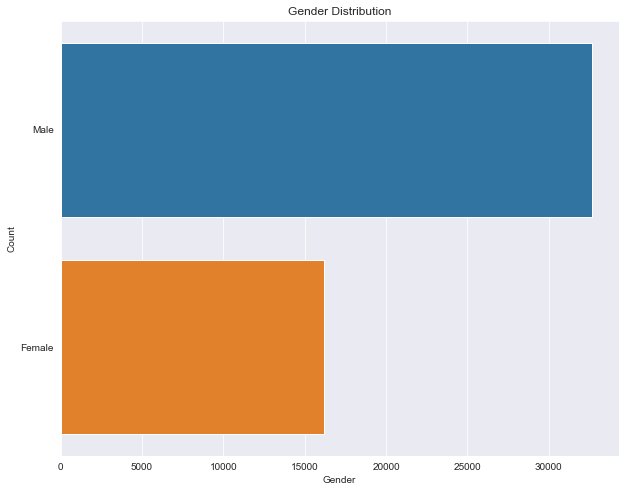

In [265]:
# Checking Marital Status 
plt.figure(figsize=(10,8))

x = list(data['gender'].value_counts().index)

y = list(data['gender'].value_counts())

plt.xlabel('Gender')

plt.ylabel('Count')


plt.title('Gender Distribution')

sns.barplot(x=y,y=x)

plt.show()

In [266]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

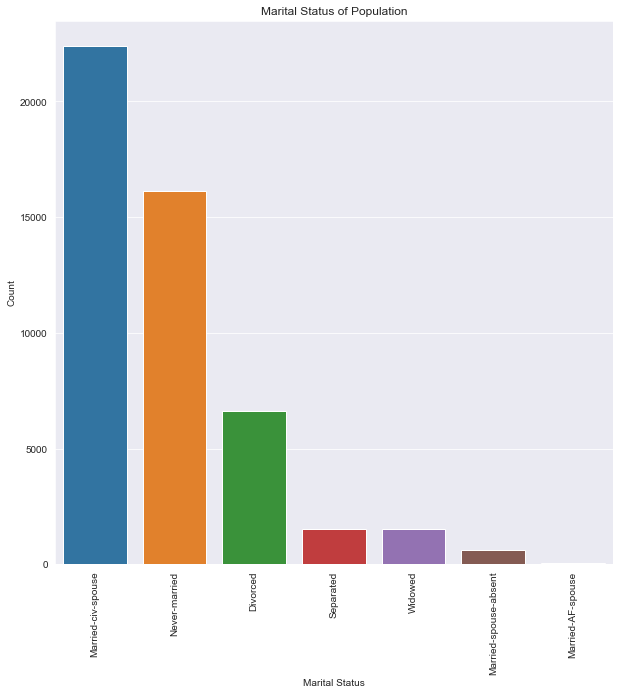

In [267]:
# checking marital status of individual


plt.figure(figsize = (10,10))

x = list(data['marital-status'].value_counts().index)

y = list(data['marital-status'].value_counts())

plt.title('Marital Status of Population')

plt.xlabel('Marital Status')

plt.ylabel('Count')

sns.barplot(x=x,y=y)

plt.xticks(rotation = 90)

plt.show()

Here we can see Married_civ_spouse has highest majority count and Married-AF-spouse has low majority count.

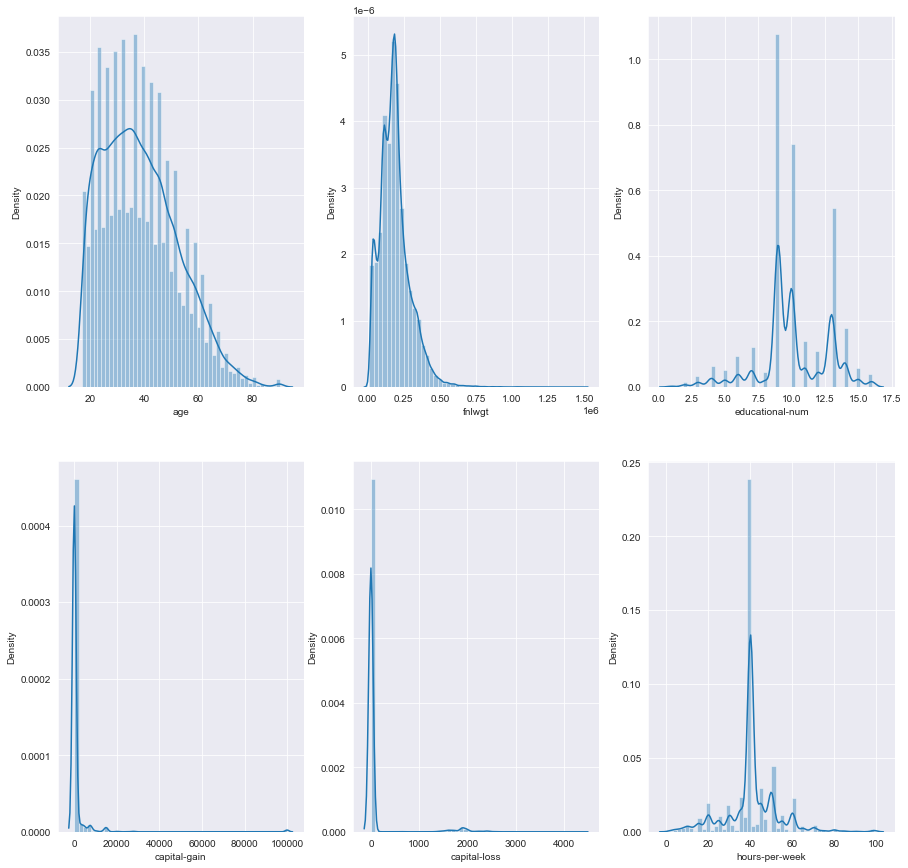

In [268]:
## plotting Density Function for Numerical columns

plt.figure(figsize=(15,15))

i = 1

for col in numerical_columns:
    plt.subplot(2,3,i)
    sns.distplot(data[col])
    i += 1

In these plots we can say that All numerical columns are not uniformaly distribbuted and some having skewness.

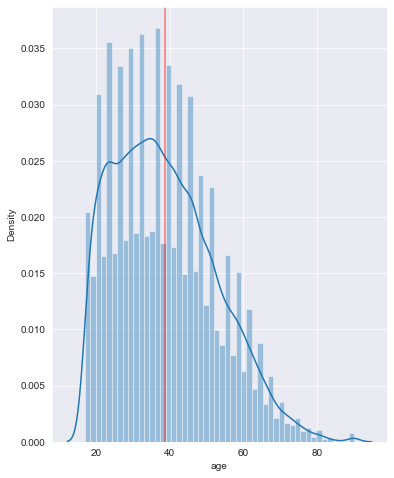

In [269]:
# distribution of the age column

plt.figure(figsize=(6,8))

sns.distplot(data['age'])

plt.axvline(data['age'].mean(),c='r',alpha=0.5)

plt.show()

Age Distribution is Right Skewed Distribution may be the presence of outliers to the positive side (Right).

In [270]:
data['age'].skew()

0.5575803166133181

In [271]:
# list of unique values in the age distribution

y = list(data['age'].value_counts())

print(y)

[1348, 1337, 1335, 1329, 1325, 1303, 1280, 1280, 1278, 1264, 1253, 1235, 1232, 1223, 1206, 1206, 1195, 1187, 1178, 1165, 1153, 1113, 1104, 1097, 1096, 1096, 1081, 1067, 1053, 877, 866, 862, 847, 845, 738, 711, 621, 613, 595, 564, 555, 551, 523, 450, 449, 394, 340, 335, 284, 238, 237, 178, 149, 133, 120, 118, 108, 77, 72, 69, 55, 54, 38, 37, 34, 30, 15, 13, 11, 6, 5, 3, 2, 1]


Text(0, 0.5, 'Count')

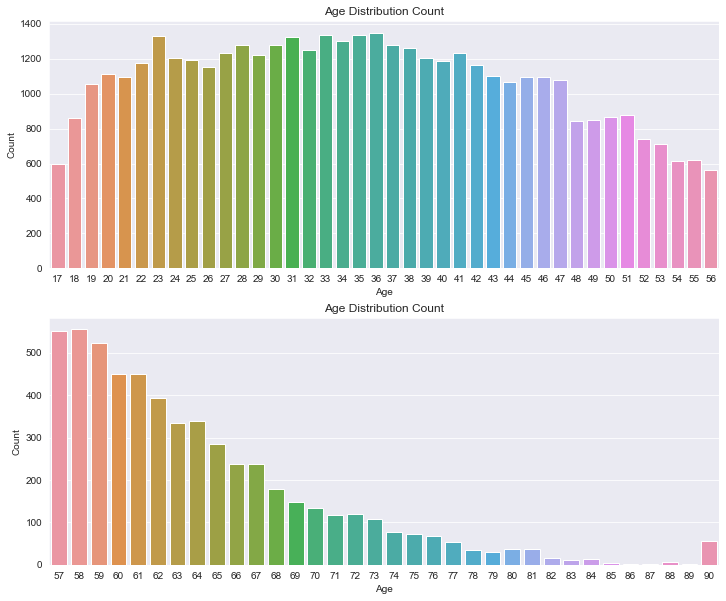

In [272]:
# using  barplot to understand the count of various age groups

plt.figure(figsize = (12,10))

x = list(data['age'].value_counts().index)

y = list(data['age'].value_counts())

# first plot
plt.subplot(2,1,1)
sns.barplot(x= x[:40], y=y[:40])
plt.title('Age Distribution Count')
plt.xlabel('Age')
plt.ylabel('Count')


# for second plot 
plt.subplot(2,1,2)
sns.barplot(x= x[40:], y=y[40:])
plt.title('Age Distribution Count')
plt.xlabel('Age')
plt.ylabel('Count')

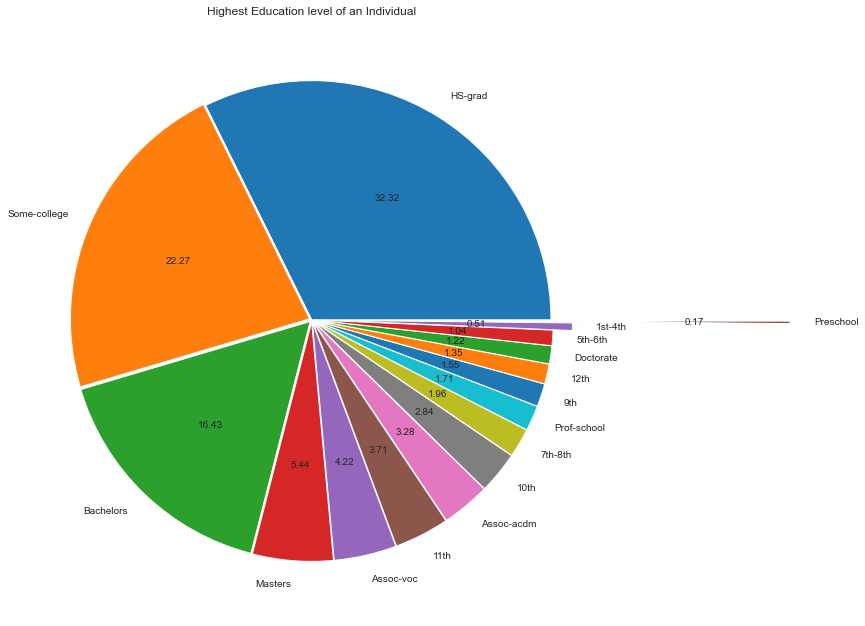

In [273]:
 # Education Columns
# Education Column

plt.figure(figsize=(11,11))

#ex = [0.01]*16

ex = [0.0,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.09,1]

x = list(data['education'].value_counts())

y = list(data['education'].value_counts().index)

plt.pie(x,labels=y,autopct='%.2f',explode=ex)

plt.title('Highest Education level of an Individual')

plt.show()

In this pie chart highest education level in HS-grad.

In [274]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

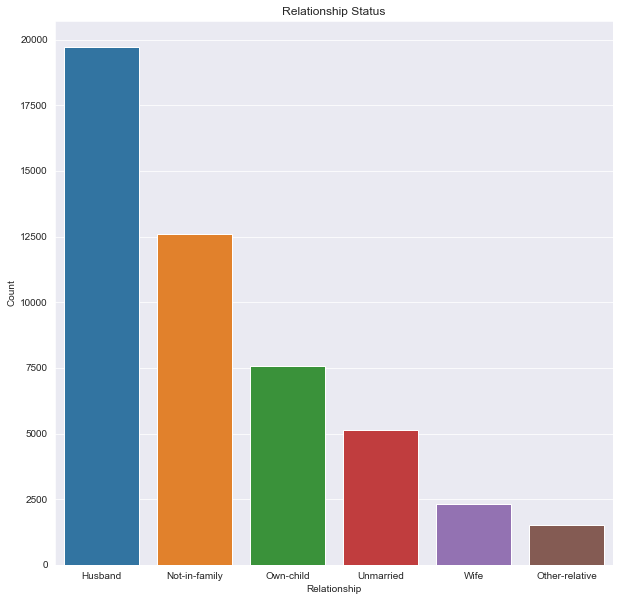

In [275]:
#checking relationship status

plt.figure(figsize=(10,10))

x = list(data['relationship'].value_counts().index)

y = list(data['relationship'].value_counts())

plt.title('Relationship Status')

plt.xlabel('Relationship')

plt.ylabel('Count')

sns.barplot(x=x,y=y)

#plt.xticks(rotation = 45)

plt.show()

Here we can see that Husband has highest majority In Relationship status.

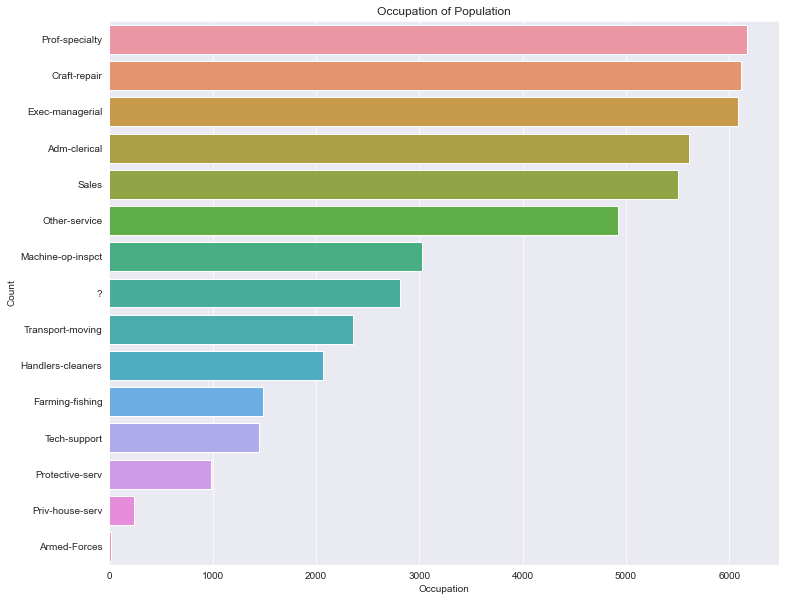

In [276]:
## occupation Designation Distribution
plt.figure(figsize = (12,10))

x = list(data['occupation'].value_counts().index)

y = list(data['occupation'].value_counts())

plt.title('Occupation of Population')

plt.xlabel('Occupation')

plt.ylabel('Count')

sns.barplot(x=y,y=x)

# plt.xticks(rotation = 45)

plt.show()

Incase of prof-speciality has highest majority.

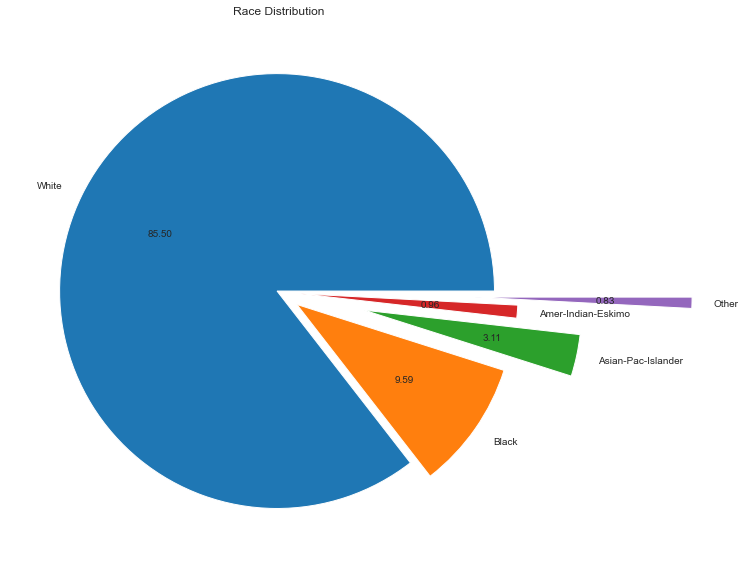

In [277]:
# Race distribution 
plt.figure(figsize=(10,10))

ex = [0.01,0.1,0.4,0.1,0.9]

x = list(data['race'].value_counts())

y = list(data['race'].value_counts().index)

plt.pie(x,labels=y,autopct='%.2f',explode=ex)

plt.title('Race Distribution')

plt.show()

Here White has highest majority among the race distribution.

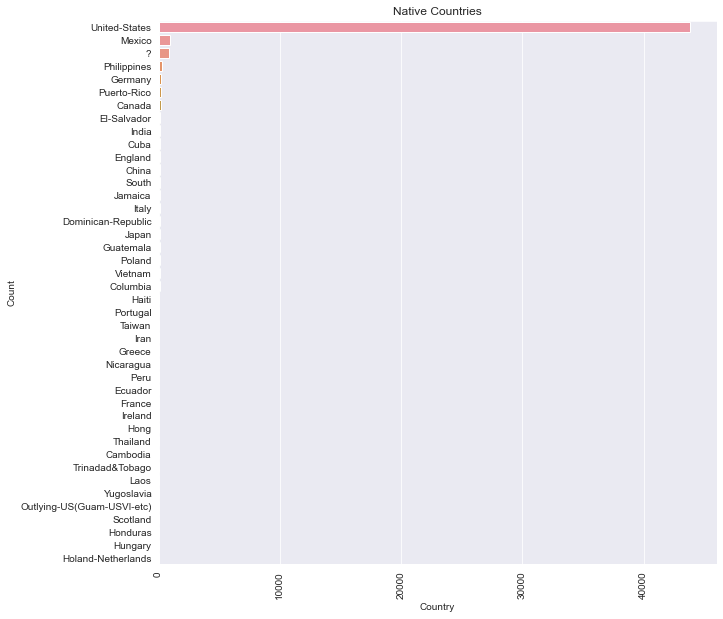

In [278]:
# relation for the native country
# Native Countries Distribution

plt.figure(figsize = (10,10))

x = list(data['native-country'].value_counts().index)

y = list(data['native-country'].value_counts())

plt.title('Native Countries')

plt.xlabel('Country')

plt.ylabel('Count')

sns.barplot(x=y,y=x)

plt.xticks(rotation = 90)

plt.show()

In this graph united states high majority count.

### Bivariate Analysis

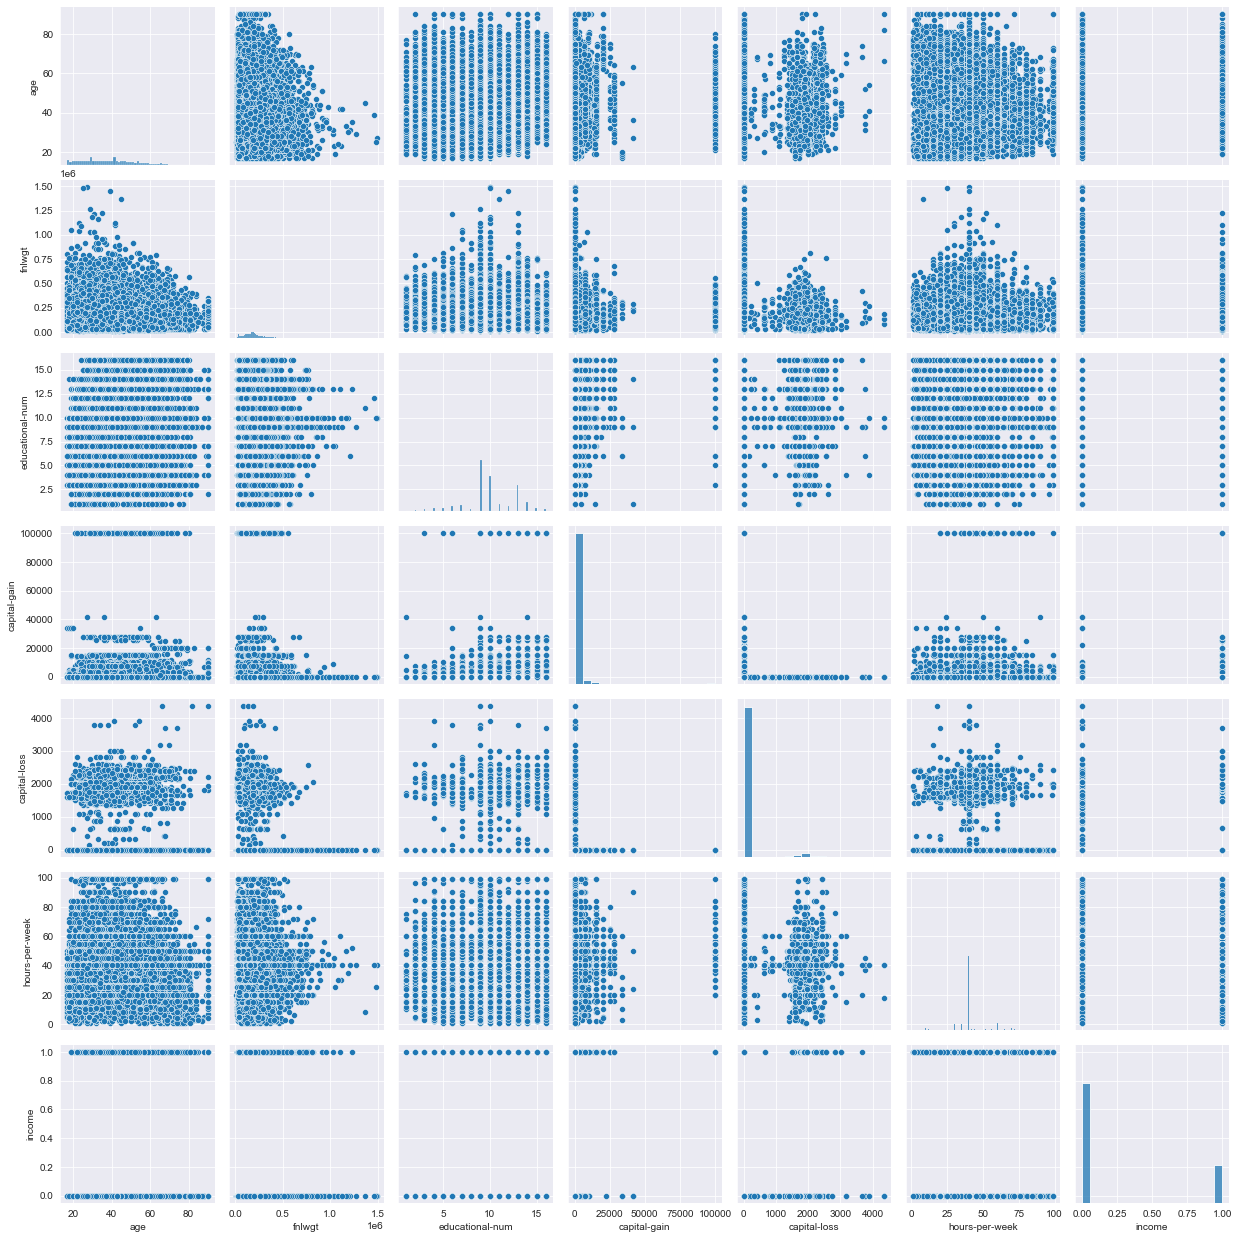

In [279]:
## Exploratotry data analysis
sns.pairplot(data)

In [280]:
# getting information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


In [281]:
# value counts in columns

for i in data.columns:
    print(data[i].value_counts())

36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
188488     1
285290     1
293579     1
114874     1
257302     1
Name: fnlwgt, Length: 28523, dtype: int64
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64
9     15784


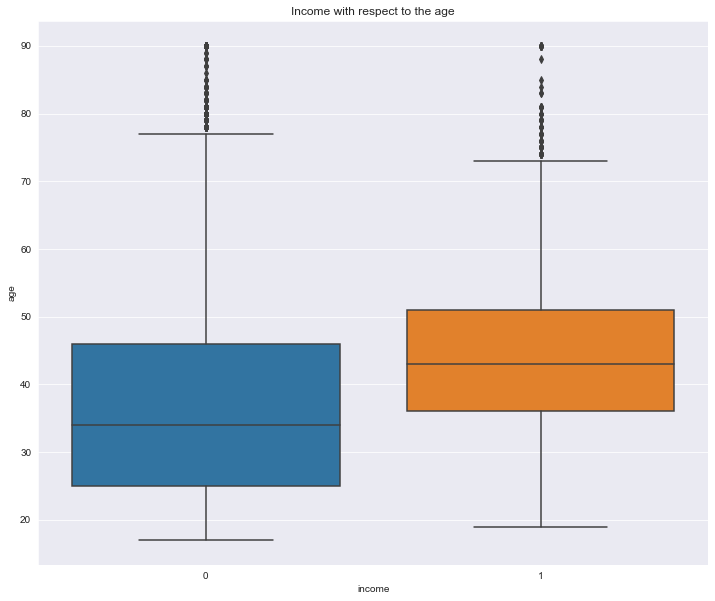

In [282]:
# Income with respect to age
fig = plt.figure(figsize=(12,10)) 
sns.boxplot(x="income", y="age", data=data)
plt.title('Income with respect to the age')
plt.show()

The above boxplot gives the age group where the concentration of population is there where income is >=50k the age group is 35-42 years.
and income is <=50k the age group is 25-45 years.

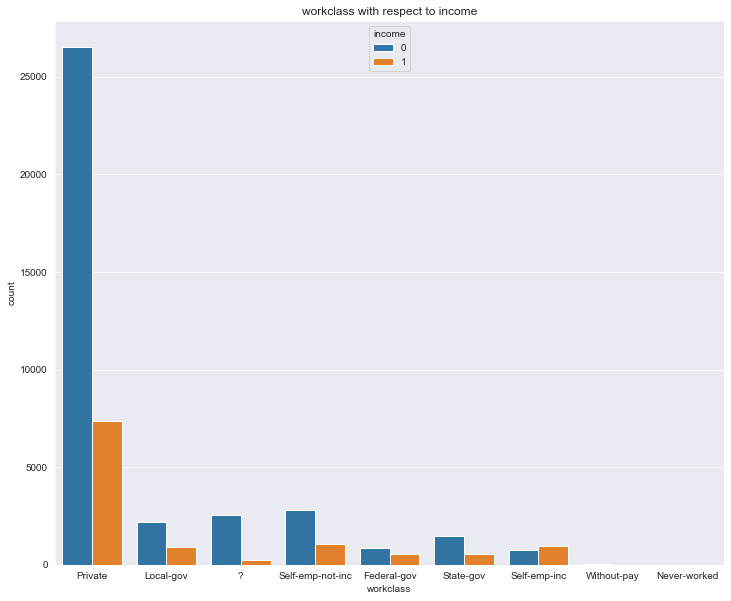

In [283]:
# relation between 'workclass' and 'income' 

plt.figure(figsize=(12,10))

sns.countplot(x='workclass', hue='income', data=data).set_title('workclass with respect to income')

plt.show()

Here data seems to mainly consist private employees.
in all the workclass number of people earning less than 50k are more then those earning 50k.  

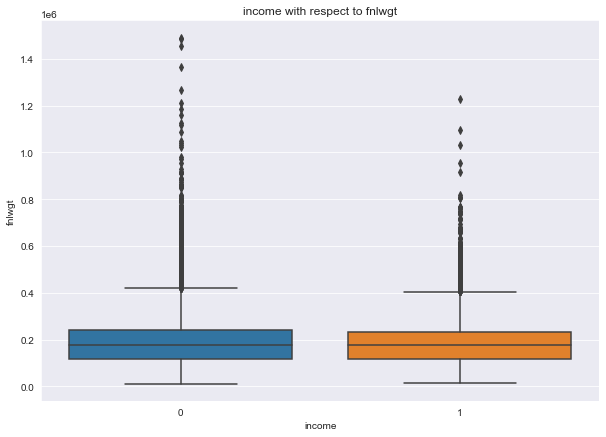

In [284]:
# relation between income and fnlweight : final weight

plt.figure(figsize=(10,7))
sns.boxplot(x="income", y="fnlwgt", data=data)
plt.title('income with respect to fnlwgt')
plt.show()

Here in this boxplot we can conclude that there is no difference in mean of incoming group > 50k and income group <=50k. It means that final weight doesnt seem to be of much use.

<Figure size 720x576 with 0 Axes>

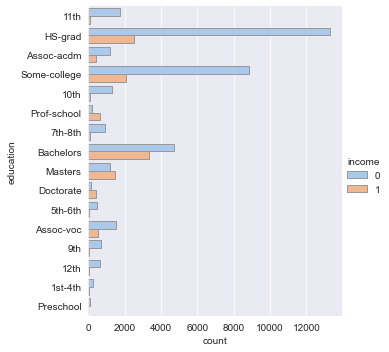

In [285]:
# let's plot counplot between education and income 
plt.figure(figsize=(10,8))
sns.catplot(y='education', hue='income', kind='count', palette='pastel', edgecolor='.6', data=data)
plt.show()

This data mostly consist of people who has education in HS-grad.

<Figure size 720x720 with 0 Axes>

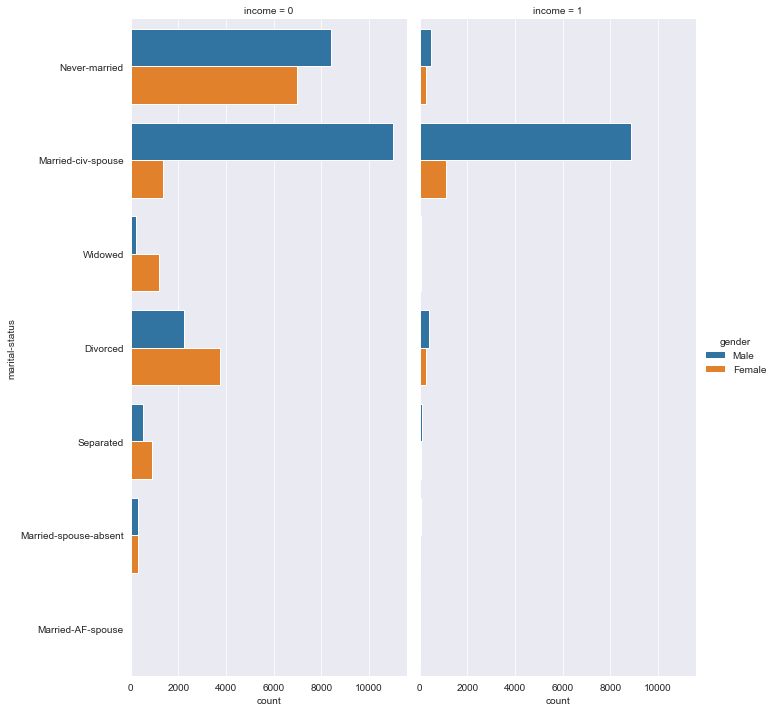

In [286]:
# let's see the relation between marital_status, gender, income 
plt.figure(figsize=(10,10))
sns.catplot(y="marital-status", hue="gender", col="income",data=data, kind="count", height=10, aspect=.5)

plt.show()

This catplot shown that the people with marital_status as Married-civ-spouce has highest people with income more then 50k.

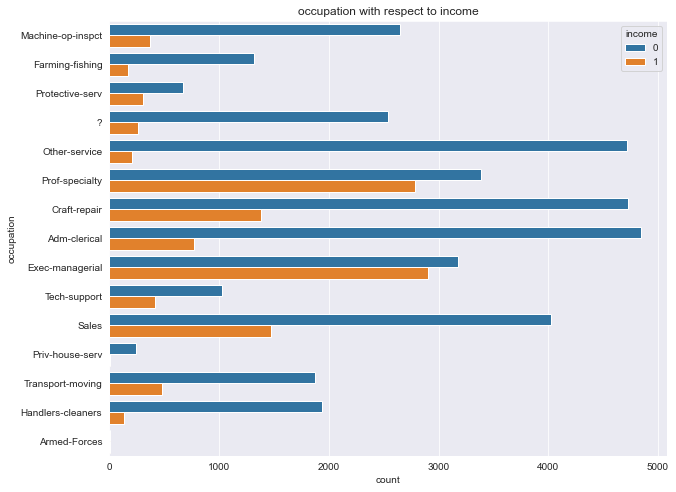

In [287]:
# now occupation and income
plt.figure(figsize=(10,8))    
sns.countplot(y='occupation', hue='income', data=data)
plt.title("occupation with respect to income")
plt.show()

In this above graph we can see that most of the people who have income more than 50k either have prof-speciality of exec-managerial as occupation.

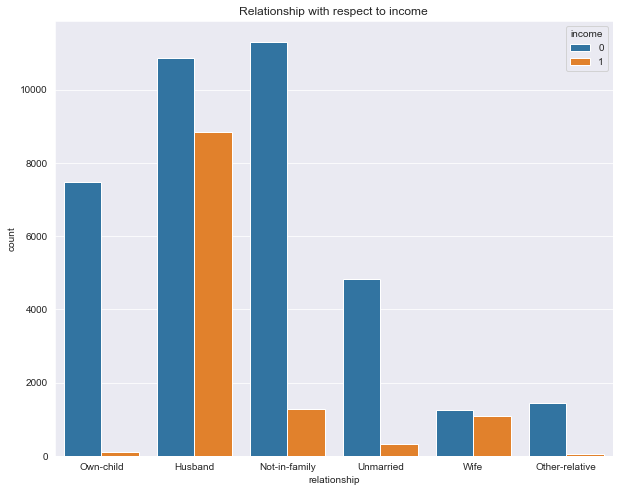

In [288]:
# relationship and income

plt.figure(figsize=(10,8))
sns.countplot(x="relationship", hue="income",data=data)
plt.title('Relationship with respect to income')
plt.show()

Income with respect to relationship status for not in family income <=50k

<Figure size 1440x576 with 0 Axes>

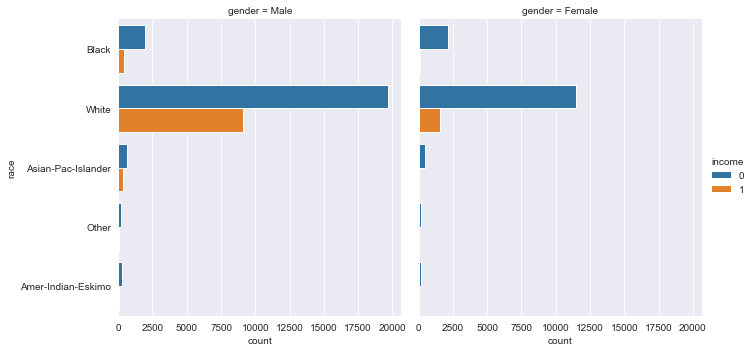

In [289]:
# let plot the relation with based on gender, race and income

plt.figure(figsize=(20,8))
sns.catplot(y='race', hue='income',kind='count', col='gender', data=data)
plt.show()

Here cleraly see that the white people has the most people with income more than 50k.

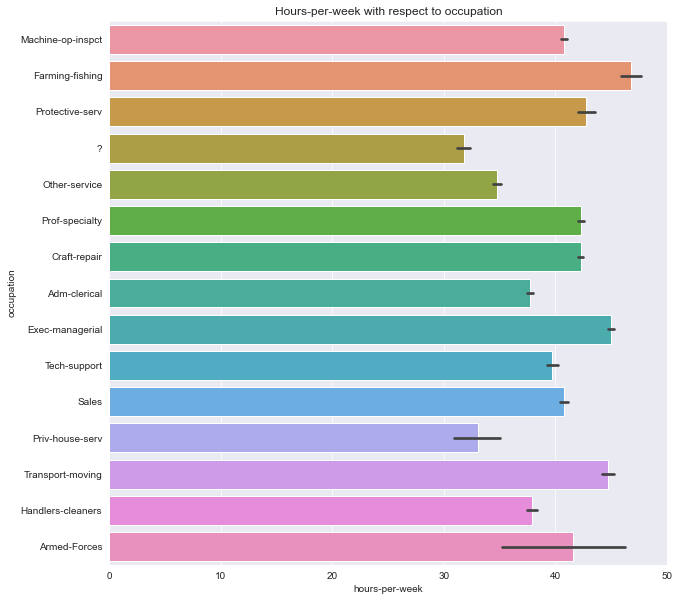

In [290]:
# Hours per week with respect to occupation

plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.barplot(x='hours-per-week', y='occupation', data=data)
plt.title('Hours-per-week with respect to occupation')
plt.show()

Here data seems like farming-fishing is work more hours in a week.

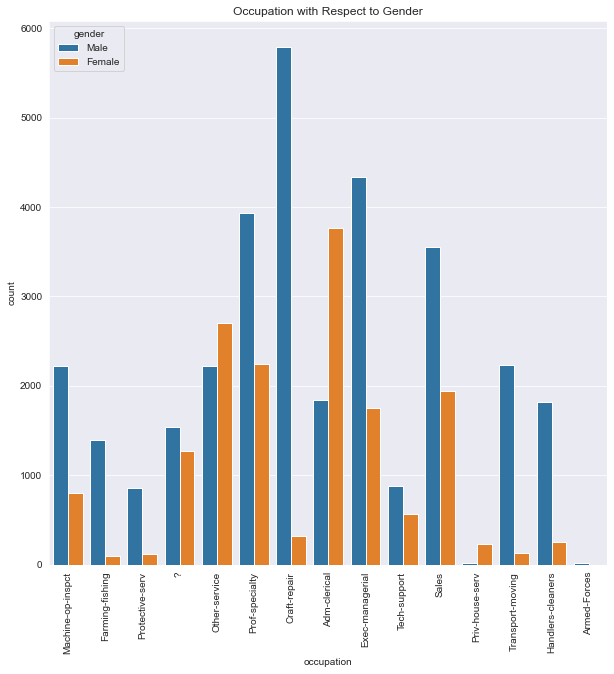

In [291]:
# occupation with the gender

plt.figure(figsize=(10,10))


sns.countplot(x='occupation',hue='gender',data=data)

plt.title('Occupation with Respect to Gender')

plt.xticks(rotation=90)

plt.show()

Occupation will respect to Gender is high for male craft repair.

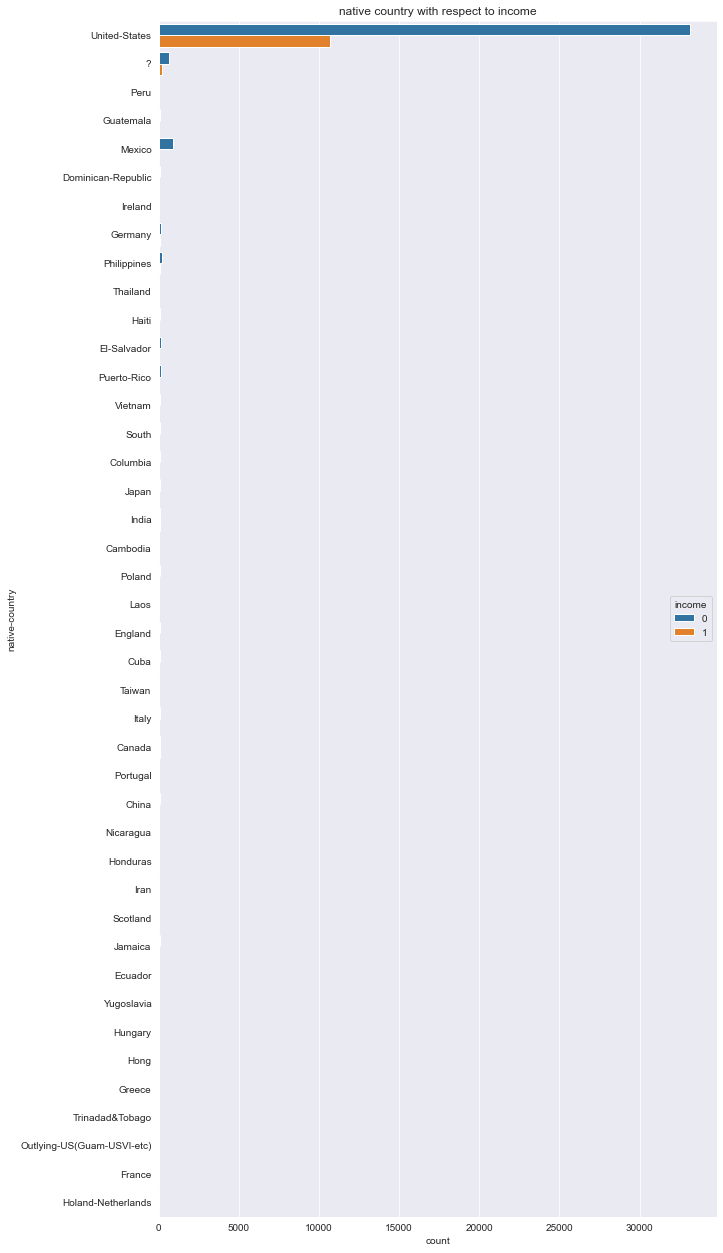

In [292]:
# let's show the relation between native-country and income


plt.figure(figsize=(10,22))

sns.countplot(y='native-country', hue='income', data=data)
plt.title("native country with respect to income")
plt.show()

This data seems like united-states has higher number of income sources.

In [293]:
# correlation matrics

data.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,0.230369
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,-0.006339
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,0.332613
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,0.223013
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,0.147554
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,0.227687
income,0.230369,-0.006339,0.332613,0.223013,0.147554,0.227687,1.000000


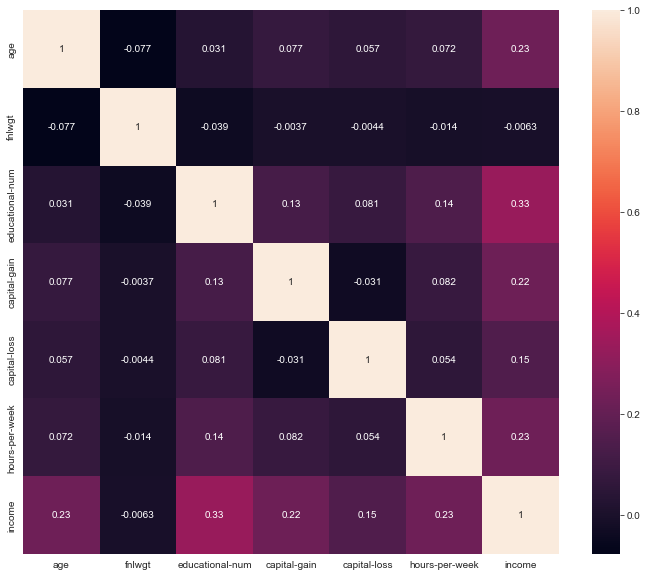

In [294]:
# let's plot the correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [295]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [296]:
data['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [297]:
# percentage of male and female working 

percentage = (data['gender'].value_counts()/data.shape[0])*100
percentage

Male      66.848204
Female    33.151796
Name: gender, dtype: float64

In [298]:
# Pivot table of Racewise Gender Distribution of Income

racewise_income = data.pivot_table(values=['income'], index=['race', 'gender'], aggfunc = 'count')
racewise_income

income
race               gender        
Amer-Indian-Eskimo Female     185
                   Male       285
Asian-Pac-Islander Female     517
                   Male      1002
Black              Female    2308
                   Male      2377
Other              Female     155
                   Male       251
White              Female   13027
                   Male     28735

In [299]:
# let's the count of gender and workclass based on income

data.pivot_table(values=['income'], index=['workclass', 'gender'], aggfunc='count')

income
workclass        gender        
?                Female    1270
                 Male      1529
Federal-gov      Female     452
                 Male       980
Local-gov        Female    1258
                 Male      1878
Never-worked     Female       3
                 Male         7
Private          Female   11599
                 Male     22307
Self-emp-inc     Female     211
                 Male      1484
Self-emp-not-inc Female     629
                 Male      3233
State-gov        Female     763
                 Male      1218
Without-pay      Female       7
                 Male        14

## Feature Engineering

After collecting the data when we explore the data and get missing values and ouliers. In this data also have missing values and outliers. so we have to clean and remove these missing values and outliers to our machine learning models.

## Handling missing values

In [300]:
# if null values exist in the data then we can replace the null values with the '?'

columns = list(data.columns)

for column in columns:
    data[column] = data[column].replace('?', np.nan)


In [301]:
# checking the null values 
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

There are three columns in the dataset where null values present. Let's handle the null the values.

In [302]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [303]:
null_values = data.isnull().any()

print(null_values)

age                False
workclass           True
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation          True
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country      True
income             False
dtype: bool


In [304]:
data.shape

(48842, 15)

In [305]:
# Removing and handling the null values we have to drop it
data.dropna(inplace = True)


In [306]:
# let' droppoing some of columns from the dataset because they are insignificant for us
data.drop(columns = ['fnlwgt','capital-gain','capital-loss'], axis=1)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,0


In [307]:
# columns of the dataset
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [308]:
# number of outliers in numerical columns
outliers = pd.DataFrame(columns=['Feature','Number of Outliers','Percentage']) # Creating a new dataframe
    
for column in list(numerical_data): # Iterating thorough each feature 
        
    # first quartile (Q1)
    q1 = data[column].quantile(0.25) 
            
    # third quartile (Q3)
    q3 = data[column].quantile(0.75)
            
    # IQR
    iqr = q3 - q1
        
    fence_low = q1 - (1.5*iqr)
        
    fence_high = q3 + (1.5*iqr)
        
    # finding the number of outliers using 'and(|) condition. 
    total_outlier = data[(data[column] < fence_low) | (data[column] > fence_high)].shape[0]
    
    percent = (total_outlier / len(data[column])) * 100
        
    outliers = outliers.append({'Feature':column,'Number of Outliers':total_outlier,'Percentage':percent},ignore_index=True)
        
outliers

,Feature,Number of Outliers,Percentage
0,age,269,0.594843
1,fnlwgt,1331,2.943258
2,educational-num,294,0.650126
3,capital-gain,3790,8.380877
4,capital-loss,2140,4.732210
5,hours-per-week,11899,26.312414


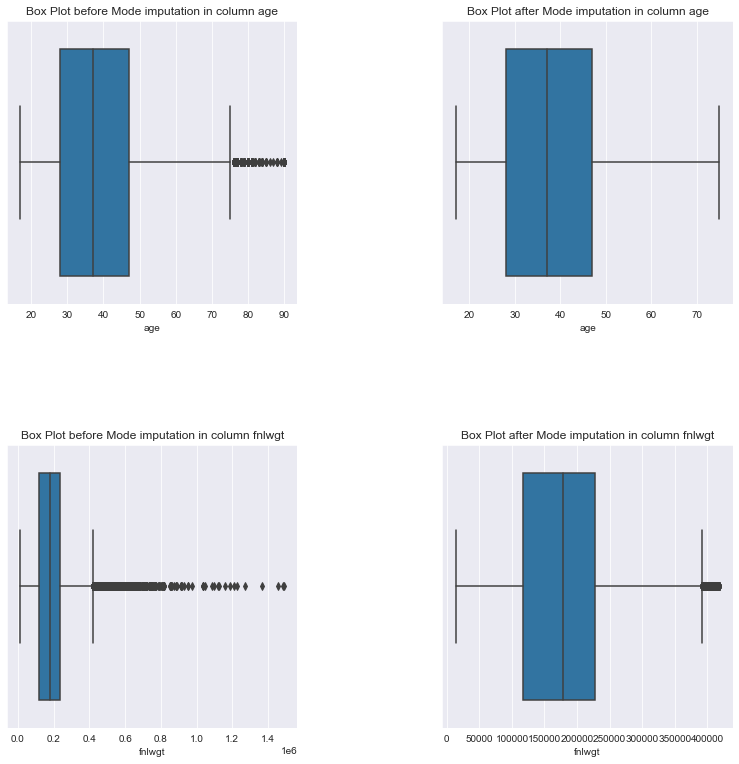

In [309]:
# computation - Imputing mode in columns having low percentage of outliers

plt.figure(figsize=(13,13))

plt.subplots_adjust(wspace=0.5,hspace=0.5)

cols = list(outliers['Feature'].iloc[:2].values)

i = 1

for col in cols:

    plt.subplot(2,2,i)
    sns.boxplot(data[col])
    plt.title(f"Box Plot before Mode imputation in column {col}")

    # Replacing Outliers
    q1 = data[col].quantile(0.25)
    
    q3 = data[col].quantile(0.75)
    
    # Iqr
    iqr = q3-q1
    
    Lower_tail = q1 - 1.5 * iqr
    
    Upper_tail = q3 + 1.5 * iqr
    
    m = data[col].mode()[0]
    
    for value in data[col]:
        
        if value > Upper_tail or value < Lower_tail:
            
                data[col] = data[col].replace(value, m)
    
    plt.subplot(2,2,i+1)
    sns.boxplot(data[col])
    plt.title(f"Box Plot after Mode imputation in column {col}")
    
    i = i+2

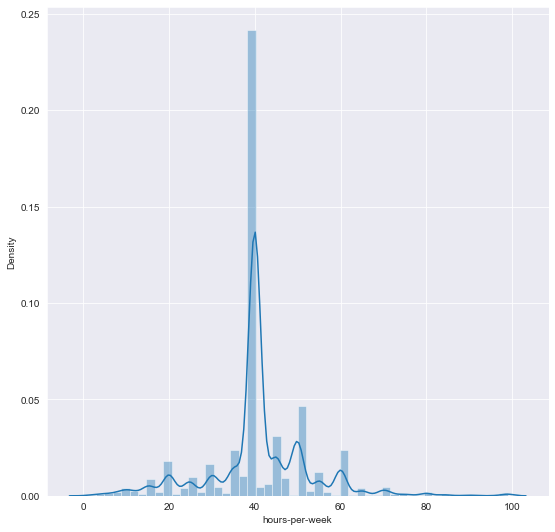

In [310]:
#There are also few people who works 80-100 hours per week and some less than 20 which is unusual. they are like outliers.

# handling Outliers in Hours-per-week featuer

# Hours-per-week Distribution

plt.figure(figsize=(9,9))

sns.distplot(data['hours-per-week'])

plt.show()

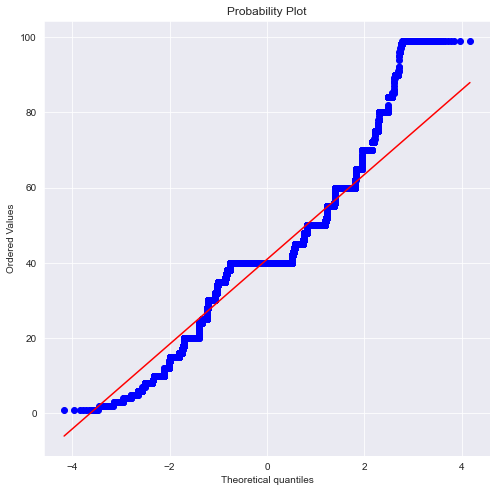

In [311]:
# Checking Normality using QQ plot

plt.figure(figsize=(8,8))

stats.probplot(data['hours-per-week'] , dist = 'norm' , plot = plt)

plt.show()

In [312]:
# box cox tranformation to handling outliers in hours_per_week column

data = np.array(data['hours-per-week'])

x_t1, l1 = stats.boxcox(data)
x_t1

array([34.66006967, 43.16400616, 34.66006967, ..., 34.66006967,
       17.34273856, 34.66006967])

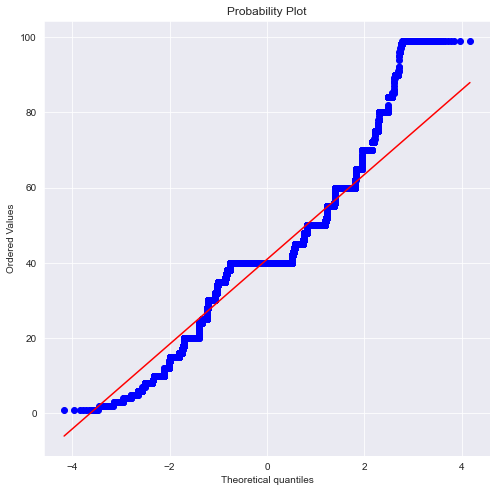

In [313]:
# Propability distribution Plot

plt.figure(figsize=(8,8))

stats.probplot(data , dist = 'norm' , plot = plt)

plt.show()

Here box cox doesnot help too much to handling outliers.

There were many outliers and missing values and skewed data with in the dataset.

The outliers, missing data, skew data was treated and made sure the data was clean to Initialize the train-test-split and built models.

### Data preprocessing

In [330]:
##standardization
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
    
data_numeric = pd.DataFrame(scaler.fit_transform(numerical_data),columns = numerical_data.columns)

data_numeric.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,0.109589,0.145129,0.400000,0.000000,0.0,0.397959
1,0.287671,0.052451,0.533333,0.000000,0.0,0.500000
2,0.150685,0.219649,0.733333,0.000000,0.0,0.397959
3,0.369863,0.100153,0.600000,0.076881,0.0,0.397959
4,0.013699,0.061708,0.600000,0.000000,0.0,0.295918


In [331]:
# # Encoding the categorical features using one hot encoder

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

data_categoric = pd.DataFrame(encoder.fit_transform(categorical_data), 
                      columns=encoder.get_feature_names(categorical_data.columns))

data_categoric.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [332]:
# Pre-Processed Dataset

train_data = pd.concat([data_numeric,data_categoric], axis = 1)

train_data.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.109589,0.145129,0.400000,0.000000,0.0,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.287671,0.052451,0.533333,0.000000,0.0,0.500000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.150685,0.219649,0.733333,0.000000,0.0,0.397959,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.369863,0.100153,0.600000,0.076881,0.0,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.013699,0.061708,0.600000,0.000000,0.0,0.295918,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [333]:
# Splitting the columns

X = train_data.iloc[:,:-1]

y = train_data.iloc[:,-1]

In [334]:
# let's split the data into train and test


from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.25, random_state=101)

## Models

In [335]:
# first using Logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

# Prediction on Test Dataset

y_pred_lr = lr.predict(X_test)

y_pred_lr

# Model Evaluation

from sklearn import metrics

metrics.accuracy_score(y_test, y_pred_lr)

0.8520186716894603

In [336]:
logistic_regression_accuracy = metrics.accuracy_score(y_test,y_pred_lr)*100
logistic_regression_accuracy

85.20186716894604

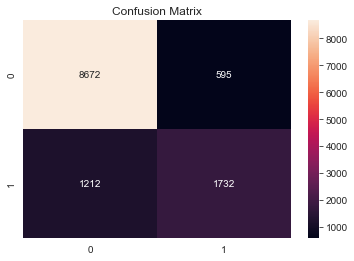

In [337]:
# Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()

In [338]:
#Logistic Regression Model Tuning (Using Regularization)

lr_score = {}

for this_C in [0.1, 1, 100]:
    
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    
    score = clf.score(X_test,y_test)
    
    lr_score[this_C] = score
lr_score

{0.1: 0.8436655474572107, 1: 0.8520186716894603, 100: 0.853165178937024}

accuracy same no imporvemnt.

In [339]:
# ROC AUC Score

prob = lr.predict_proba(X_test)

prob = prob[:, 1]

roc_auc_lr = metrics.roc_auc_score(y_test, prob)

print('Logistic Regression ROC_AUC Score : {}'.format(roc_auc_lr))

Logistic Regression ROC_AUC Score : 0.9068702246986736


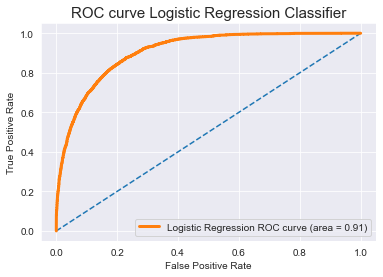

In [340]:
# Plotting Roc Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, prob)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model
plt.plot(fpr, tpr, lw=3, label='Logistic Regression ROC curve (area = {:0.2f})'.format(roc_auc_lr))

plt.title('ROC curve Logistic Regression Classifier', fontsize=15)

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [341]:
# K- Nearest Neighbour Classifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7)

knn.fit(X_train,y_train)

# Prediction

y_pred_knn = knn.predict(X_test)

y_pred_knn

# Model Evaluation 

print('Accuracy of KNN on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of KNN on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of KNN on training set: 0.87
Accuracy of KNN on test set: 0.83


In [342]:
KNN_model_accuracy = metrics.accuracy_score(y_test,y_pred_knn)*100
KNN_model_accuracy

82.8597166489231

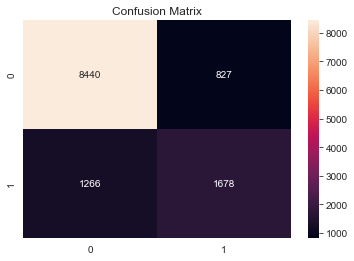

In [343]:
# Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()

In [344]:
# Decision tree Classifier

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

# Prediction

y_pred_dt = dt.predict(X_test)
y_pred_dt

# Evaluation of the model 

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dt.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dt.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.82


In [345]:
dt_accuracy = metrics.accuracy_score(y_test,y_pred_dt)*100
dt_accuracy

81.69683072639423

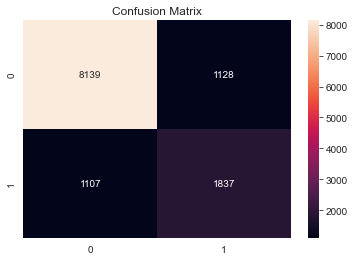

In [346]:
# Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()

In [347]:

# ROC AUC Score

prob_dt = dt.predict_proba(X_test)

prob_dt = prob_dt[:, 1]

roc_auc_dt = metrics.roc_auc_score(y_test, prob_dt)

print('Decision Trees ROC_AUC Score : {}'.format(roc_auc_dt))

Decision Trees ROC_AUC Score : 0.751109080960491


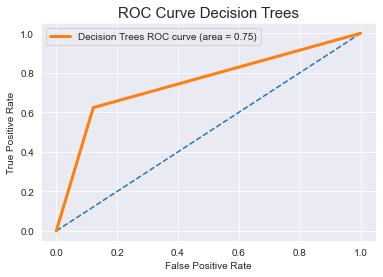

In [348]:
# Plotting Roc Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_dt)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model

plt.plot(fpr, tpr, lw=3, label='Decision Trees ROC curve (area = {:0.2f})'.format(roc_auc_dt))

plt.title('ROC Curve Decision Trees', fontsize=15)

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [349]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

gbt = GradientBoostingClassifier(random_state = 0)

# Fitting the data

gbt.fit(X_train, y_train)

y_pred_gbt= gbt.predict(X_test)
y_pred_gbt

array([0., 0., 0., ..., 0., 0., 1.])

In [350]:
# Model Evaluation

print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(gbt.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(gbt.score(X_test, y_test)))

Accuracy of GBDT classifier on training set: 0.87
Accuracy of GBDT classifier on test set: 0.86



In [351]:
GBDT_accuracy = metrics.accuracy_score(y_test,y_pred_gbt)*100
GBDT_accuracy

86.3483744165097

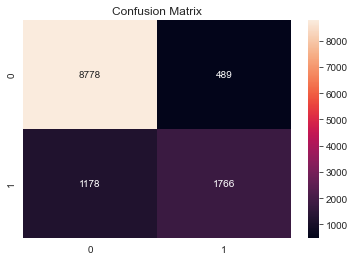

In [352]:
# Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_gbt), annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()

In [353]:
# ROC AUC Score

prob_gbdt = gbt.predict_proba(X_test)

prob_gbdt = prob_gbdt[:, 1]

roc_auc_gbdt = metrics.roc_auc_score(y_test, prob_gbdt)

print('Gradient Boosting ROC_AUC Score : {}'.format(roc_auc_gbdt))

Gradient Boosting ROC_AUC Score : 0.9197012995505324


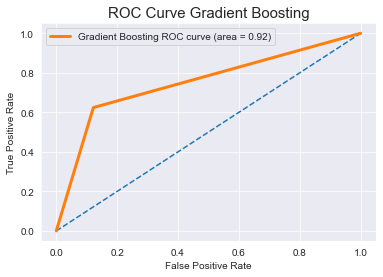

In [354]:
# Plotting Roc Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_dt)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model

plt.plot(fpr, tpr, lw=3, label='Gradient Boosting ROC curve (area = {:0.2f})'.format(roc_auc_gbdt))

plt.title('ROC Curve Gradient Boosting', fontsize=15)

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [357]:
x = {'Logistic Regression' : logistic_regression_accuracy,'K Nearest Neighbour': KNN_model_accuracy,'decision tree' : dt_accuracy,'Gradient Boosting':GBDT_accuracy}


In [358]:
x

{'Logistic Regression': 85.20186716894604,
 'K Nearest Neighbour': 82.8597166489231,
 'decision tree': 81.69683072639423,
 'Gradient Boosting': 86.3483744165097}

In [359]:
accuracy = pd.DataFrame.from_dict(x, orient='index',columns=['accuracy'])
accuracy

,accuracy
Logistic Regression,85.201867
K Nearest Neighbour,82.859717
decision tree,81.696831
Gradient Boosting,86.348374


Here we can see the Gradient boosting give best performance.